In [421]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
import sklearn.datasets

plt.style.use('ggplot')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [422]:
df_stats=pd.read_csv('2020-2021_per36.csv')

In [423]:
df_stats.describe()

,Rk,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,539.000000,540.000000,540.000000,...,522.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000
mean,270.500000,25.555556,42.692593,20.000000,965.737037,5.496296,12.260556,0.447703,1.649444,4.864259,...,0.753718,1.584074,5.097407,6.677407,3.215926,1.098889,0.786296,1.970741,3.192222,14.887037
std,156.028843,4.108305,20.706670,23.176183,697.136883,2.154726,3.748338,0.106992,1.141289,2.795477,...,0.140732,1.323011,2.165763,3.146127,2.030812,0.572919,0.780940,1.626598,1.395226,5.480485
min,1.000000,19.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,135.750000,22.000000,26.750000,1.000000,298.500000,4.200000,9.675000,0.403000,0.700000,3.000000,...,0.688500,0.600000,3.575000,4.400000,1.800000,0.800000,0.300000,1.300000,2.400000,11.500000
50%,270.500000,25.000000,46.000000,8.000000,926.000000,5.400000,11.850000,0.442000,1.600000,5.000000,...,0.776000,1.100000,4.700000,6.000000,2.650000,1.000000,0.600000,1.700000,3.000000,14.600000
75%,405.250000,28.000000,61.000000,38.000000,1505.500000,6.700000,14.800000,0.496500,2.425000,6.700000,...,0.845000,2.200000,6.200000,8.225000,4.100000,1.400000,1.100000,2.300000,3.800000,17.825000
max,540.000000,40.000000,72.000000,72.000000,2667.000000,24.000000,27.000000,1.000000,5.600000,13.400000,...,1.000000,7.000000,13.300000,20.000000,11.600000,5.400000,6.200000,30.000000,12.000000,48.000000


In [424]:
df_stats['Player'] = df_stats['Player'].apply(lambda x: x.split('\\', 1)[0])

In [425]:
df_stats['Player']

0              Precious Achiuwa
1                  Jaylen Adams
2                  Steven Adams
3                   Bam Adebayo
4             LaMarcus Aldridge
5             Ty-Shon Alexander
6      Nickeil Alexander-Walker
7                 Grayson Allen
8                 Jarrett Allen
9               Al-Farouq Aminu
10                Kyle Anderson
11        Giannis Antetokounmpo
12         Kostas Antetokounmpo
13       Thanasis Antetokounmpo
14              Carmelo Anthony
15                 Cole Anthony
16                   OG Anunoby
17             Ryan Arcidiacono
18                 Trevor Ariza
19                D.J. Augustin
20                  Deni Avdija
21                Deandre Ayton
22               Udoka Azubuike
23                 Dwayne Bacon
24            Marvin Bagley III
25                  LaMelo Ball
26                   Lonzo Ball
27                     Mo Bamba
28                 Desmond Bane
29              Harrison Barnes
                 ...           
510     

In [426]:
df_physical=pd.read_csv('2020-2021_data.csv')

In [427]:
df_physical.keys()

Index(['Name', 'Height', 'Weight'], dtype='object')

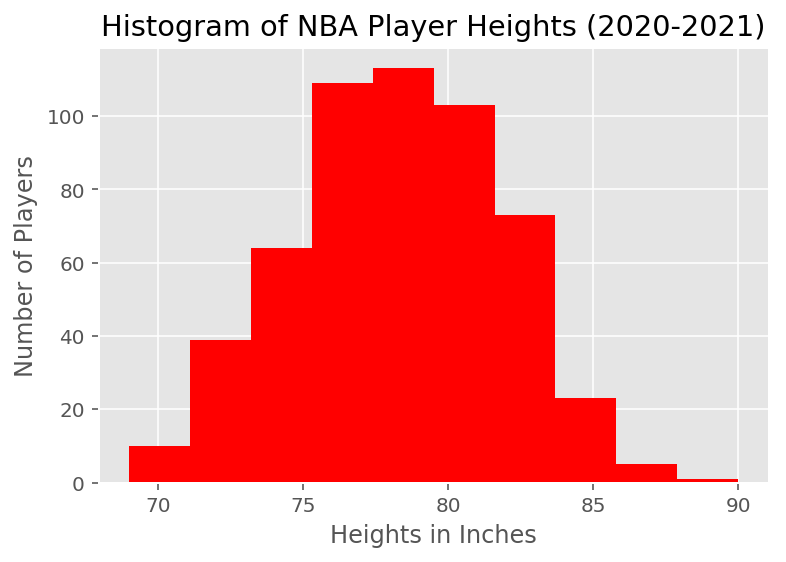

In [428]:
plt.hist(df_physical['Height'],color='r')
plt.title('Histogram of NBA Player Heights (2020-2021)')
plt.xlabel('Heights in Inches')
plt.ylabel('Number of Players')
plt.show()

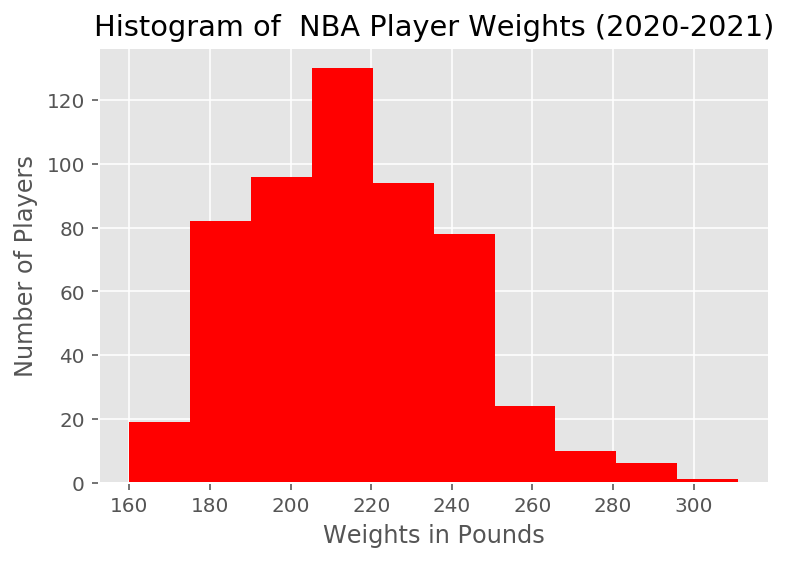

In [429]:
plt.hist(df_physical['Weight'],color='r')
plt.title('Histogram of  NBA Player Weights (2020-2021)')
plt.xlabel('Weights in Pounds')
plt.ylabel('Number of Players')
plt.show()

In [430]:
merged_inner = pd.merge(left=df_stats, right=df_physical, left_on='Player', right_on='Name')

In [431]:
merged_inner

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,TRB,AST,STL,BLK,TOV,PF,PTS,Name,Height,Weight
0,1,Precious Achiuwa,PF,21,MIA,61,4,737,6.1,11.1,...,10.2,1.4,1.0,1.4,2.1,4.4,14.8,Precious Achiuwa,80,225
1,2,Jaylen Adams,PG,24,MIL,7,0,18,2.0,16.0,...,6.0,4.0,0.0,0.0,0.0,2.0,4.0,Jaylen Adams,72,225
2,3,Steven Adams,C,27,NOP,58,58,1605,4.2,6.9,...,11.5,2.5,1.2,0.9,1.7,2.5,9.8,Steven Adams,83,265
3,4,Bam Adebayo,C,23,MIA,64,64,2143,7.7,13.4,...,9.6,5.8,1.3,1.1,2.8,2.4,20.1,Bam Adebayo,81,255
4,5,LaMarcus Aldridge,C,35,TOT,26,23,674,7.5,15.8,...,6.3,2.6,0.6,1.5,1.4,2.5,18.8,LaMarcus Aldridge,83,250
5,6,Ty-Shon Alexander,SG,22,PHO,15,0,47,2.3,9.2,...,7.7,4.6,0.0,0.8,2.3,1.5,6.9,Ty-Shon Alexander,75,195
6,7,Nickeil Alexander-Walker,SG,22,NOP,46,13,1007,6.9,16.4,...,5.1,3.6,1.7,0.8,2.5,3.1,18.2,Nickeil Alexander-Walker,78,205
7,8,Grayson Allen,SG,25,MEM,50,38,1259,4.9,11.8,...,4.6,3.1,1.3,0.2,1.4,2.0,15.2,Grayson Allen,76,198
8,9,Jarrett Allen,C,22,TOT,63,45,1864,5.8,9.3,...,12.2,2.0,0.6,1.7,1.9,1.9,15.6,Jarrett Allen,83,243
9,10,Al-Farouq Aminu,PF,30,TOT,23,14,434,3.2,8.2,...,9.1,2.6,1.6,0.7,2.3,2.4,8.5,Al-Farouq Aminu,80,220


In [432]:
merged_inner=merged_inner[merged_inner['MP']>=360]
len(merged_inner)

386

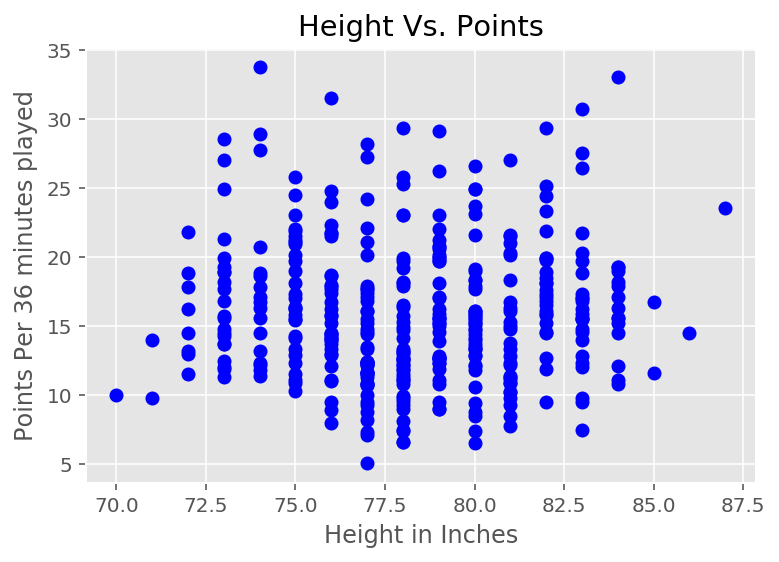

In [433]:
plt.plot(merged_inner['Height'],merged_inner['PTS'], "bo")
plt.xlabel("Height in Inches")
plt.ylabel("Points Per 36 minutes played")
plt.title("Height Vs. Points")
plt.show()

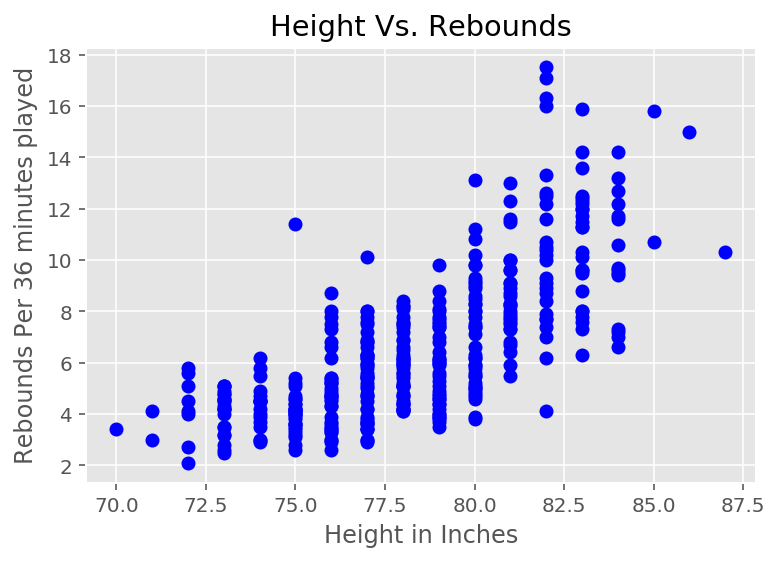

In [434]:
plt.plot(merged_inner['Height'],merged_inner['TRB'], "bo")
plt.xlabel("Height in Inches")
plt.ylabel("Rebounds Per 36 minutes played")
plt.title("Height Vs. Rebounds")
plt.show()

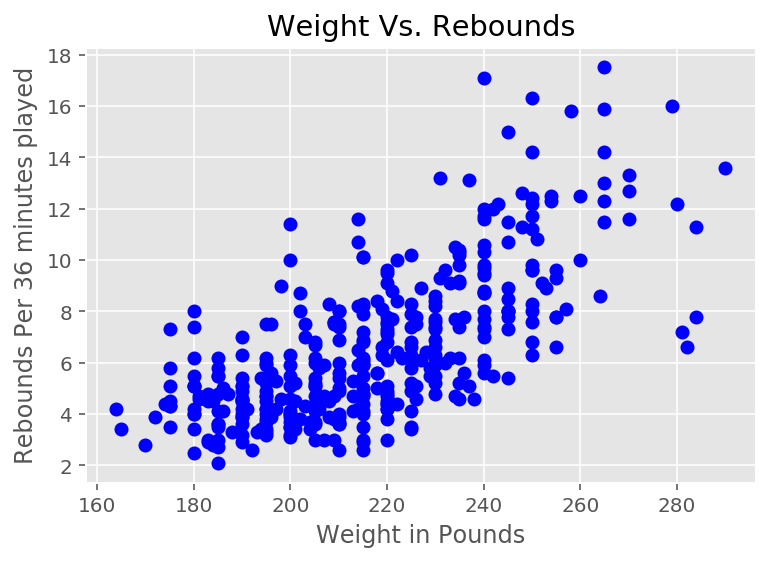

In [435]:
plt.plot(merged_inner['Weight'],merged_inner['TRB'], "bo")
plt.xlabel("Weight in Pounds")
plt.ylabel("Rebounds Per 36 minutes played")
plt.title("Weight Vs. Rebounds")
plt.show()

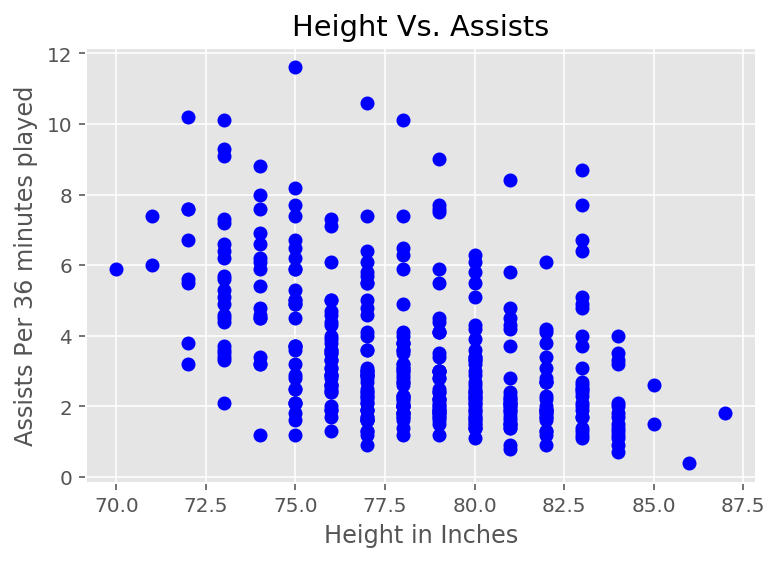

In [436]:
plt.plot(merged_inner['Height'],merged_inner['AST'], "bo")
plt.xlabel("Height in Inches")
plt.ylabel("Assists Per 36 minutes played")
plt.title("Height Vs. Assists")
plt.show()

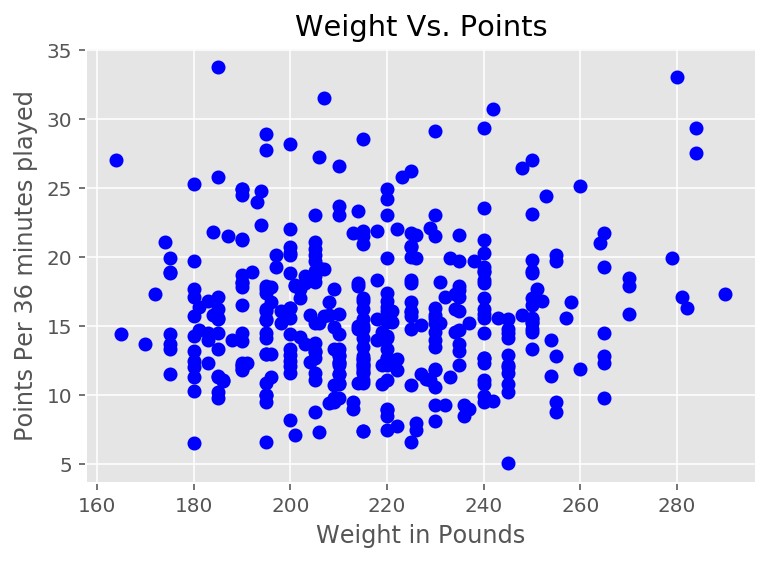

In [437]:
plt.plot(merged_inner['Weight'],merged_inner['PTS'], "bo")
plt.xlabel("Weight in Pounds")
plt.ylabel("Points Per 36 minutes played")
plt.title("Weight Vs. Points")
plt.show()

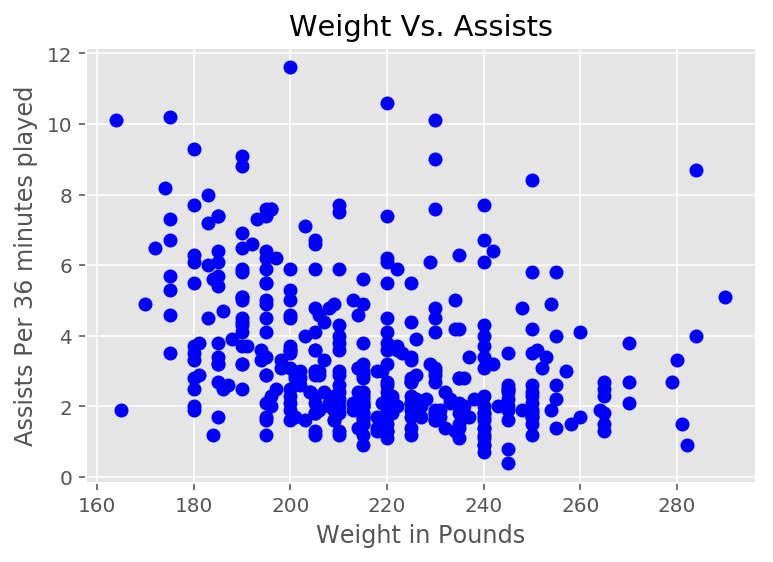

In [438]:
plt.plot(merged_inner['Weight'],merged_inner['AST'], "bo")
plt.xlabel("Weight in Pounds")
plt.ylabel("Assists Per 36 minutes played")
plt.title("Weight Vs. Assists")
plt.show()

In [439]:
merged_inner=merged_inner.replace({'PG':0, 'PG-SG':0,'SG-PG':1,'SG':1,'SG-SF':1,'SF-SG':2
                                   ,'SF':2,'SF-PF':2,'PF-SF':3,'PF':3,'PF-C':3,'C-PF':4,'C':4})
merged_inner.describe()

,Rk,Pos,Age,G,GS,MP,FG,FGA,FG%,3P,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Height,Weight
count,386.000000,386.000000,386.000000,386.000000,386.000000,386.000000,386.000000,386.000000,386.000000,386.000000,...,386.000000,386.000000,386.000000,386.000000,386.000000,386.000000,386.000000,386.000000,386.000000,386.000000
mean,268.955959,1.943005,26.041451,53.196891,27.626943,1292.777202,5.858549,12.642228,0.465267,1.836010,...,5.099223,6.600777,3.464508,1.123575,0.752332,1.887306,2.981606,15.897927,78.274611,216.878238
std,158.719014,1.396420,4.209247,12.891459,23.371882,547.715807,1.818646,3.625968,0.072404,1.099527,...,1.954834,2.917030,2.025374,0.393372,0.662429,0.782782,0.921376,5.016124,3.219620,24.508640
min,1.000000,0.000000,19.000000,20.000000,0.000000,364.000000,1.800000,4.700000,0.303000,0.000000,...,1.700000,2.100000,0.400000,0.300000,0.000000,0.300000,0.900000,5.100000,70.000000,164.000000
25%,130.250000,1.000000,23.000000,44.000000,6.000000,846.750000,4.500000,10.025000,0.418250,1.100000,...,3.700000,4.400000,1.900000,0.825000,0.300000,1.300000,2.400000,12.300000,76.000000,200.000000
50%,266.500000,2.000000,26.000000,55.000000,22.500000,1256.000000,5.600000,12.200000,0.450000,1.800000,...,4.600000,5.900000,2.900000,1.000000,0.500000,1.800000,2.900000,15.350000,78.000000,215.000000
75%,406.750000,3.000000,29.000000,64.000000,49.750000,1746.750000,7.000000,15.075000,0.497750,2.600000,...,6.200000,8.000000,4.500000,1.400000,0.975000,2.300000,3.500000,18.675000,81.000000,234.750000
max,540.000000,4.000000,37.000000,72.000000,72.000000,2667.000000,11.300000,23.200000,0.763000,5.600000,...,11.900000,17.500000,11.600000,2.900000,3.900000,4.700000,6.700000,33.700000,87.000000,290.000000


In [440]:
import numpy as np
import pandas as pd
import sklearn as sk
import sklearn.datasets

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from pandas import DataFrame
np.random.seed(1)
sub_features=['PTS', 'TRB','AST']
target_height=['Height']
target_weight=['Weight']
#Split data into testing and training 
X_train, X_test, y_train, y_test = train_test_split(merged_inner[sub_features], merged_inner[target_height], test_size=.2)
X_train2, X_test2, y_train2, y_test2 = train_test_split(merged_inner[sub_features], merged_inner[target_weight], test_size=.2)

height_model=LinearRegression()
height_model.fit(X_train, y_train)
y_hat_train=height_model.predict(X_train)
y_hat_test=height_model.predict(X_test)
train_r2=height_model.score(X_train, y_train)
test_r2=height_model.score(X_test, y_test)
print(train_r2)
print(test_r2)

weight_model=LinearRegression()
weight_model.fit(X_train2, y_train2)
y_hat_train2=weight_model.predict(X_train2)
y_hat_test2=weight_model.predict(X_test2)
train_r2_2=weight_model.score(X_train2, y_train2)
test_r2_2=weight_model.score(X_test2, y_test2)
print(train_r2_2)
print(test_r2_2)

0.6158463070920273
0.6045663073998371
0.5450484785880878
0.4277509812938808


In [441]:
print(height_model.predict([[20, 4, 5]]))
print(weight_model.predict([[20,4,5]]))

[[75.80782401]]
[[200.08052112]]


In [442]:
#Classification
train,test=train_test_split(merged_inner, test_size=.5)
from sklearn.neighbors import KNeighborsClassifier
k = 6
model=KNeighborsClassifier(k)
target_pos=['Pos']
features=['FG','FGA','FG%','3P','3PA','2P','2PA','FT','FTA','FT%','ORB','DRB','TRB','AST','STL','BLK','TOV','PF','PTS']
model.fit(train[sub_features],train[target_pos].values.ravel())
model.predict(test[sub_features])
model.score(test[sub_features],test[target_pos].values.ravel())

0.5077720207253886

In [443]:
model.predict([[30,0,10]])

array([0])

In [444]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, f1_score, classification_report, make_scorer
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

#create a model object
modelLogistic=LogisticRegression()
#train our model
modelLogistic.fit(train[sub_features],train[target_pos].values.ravel())
#evaluate the model 
acc_score_2=model_selection.cross_val_score(modelLogistic,merged_inner[sub_features],merged_inner[target_pos].values.ravel(), cv=7)
print(f"fit accuracy: {acc_score_2.mean()}")
from sklearn import metrics
from sklearn.metrics import confusion_matrix, f1_score, classification_report, make_scorer
from sklearn import model_selection
scorerVar = make_scorer(f1_score, average='micro')
f1_score_2=model_selection.cross_val_score(modelLogistic,merged_inner[sub_features],merged_inner[target_pos].values.ravel(), cv=7, scoring=scorerVar)
print(f"f-score: {f1_score_2.mean()}")
#confusion matrix
conf_matrix_2 = sk.metrics.confusion_matrix(merged_inner[target_pos].values.ravel(), modelLogistic.predict(merged_inner[sub_features]))
print(conf_matrix_2)
#classification report
classification_rprt2=sk.metrics.classification_report(merged_inner[target_pos].values.ravel(), modelLogistic.predict(merged_inner[sub_features]))
print(classification_rprt2)

/opt/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

fit accuracy: 0.5722634508348794


/opt/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

f-score: 0.5722634508348794
[[52 19  0  1  1]
 [10 68  9  9  0]
 [ 3 25 21 14  6]
 [ 2 11 22 23 18]
 [ 0  1  2 11 58]]
              precision    recall  f1-score   support

           0       0.78      0.71      0.74        73
           1       0.55      0.71      0.62        96
           2       0.39      0.30      0.34        69
           3       0.40      0.30      0.34        76
           4       0.70      0.81      0.75        72

    accuracy                           0.58       386
   macro avg       0.56      0.57      0.56       386
weighted avg       0.56      0.58      0.56       386



/opt/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [445]:
from sklearn.svm import SVC
#create a model object
modelSVC=SVC()
#train our model
modelSVC.fit(train[sub_features],train[target_pos].values.ravel())
#evaluate the model 
acc_score_2=model_selection.cross_val_score(modelSVC,merged_inner[sub_features],merged_inner[target_pos].values.ravel(), cv=7)
print(f"fit accuracy: {acc_score_2.mean()}")

fit accuracy: 0.5232374768089054


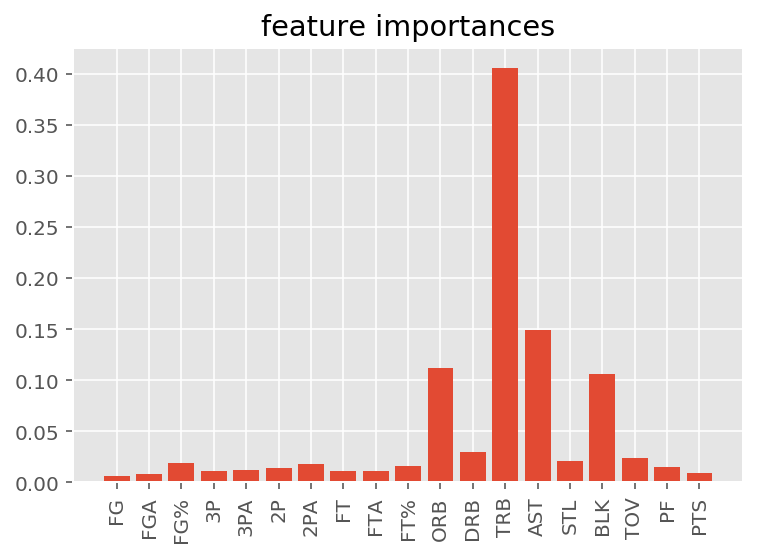

In [446]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, explained_variance_score
X_train, X_test, y_train, y_test = train_test_split(merged_inner[features], merged_inner[target_pos].values.ravel(), test_size=0.2)
rf_clf = RandomForestRegressor(n_estimators=1000,max_depth=10)
rf_clf.fit(X_train,y_train)
importances = list(rf_clf.feature_importances_)
labeled_importances = [(feature, round(importance, 2)) for feature, importance in zip(features, importances)]
indices = range(len(importances))
plt.bar(indices, importances, orientation = 'vertical')
plt.title('feature importances')
plt.xticks(indices, features, rotation='vertical')
plt.show()

In [447]:
r2 = rf_clf.score(X_test,y_test)
print(r2)
ev = explained_variance_score(y_test,rf_clf.predict(X_test))
print(ev)

0.7531918970880787
0.7610046621122702


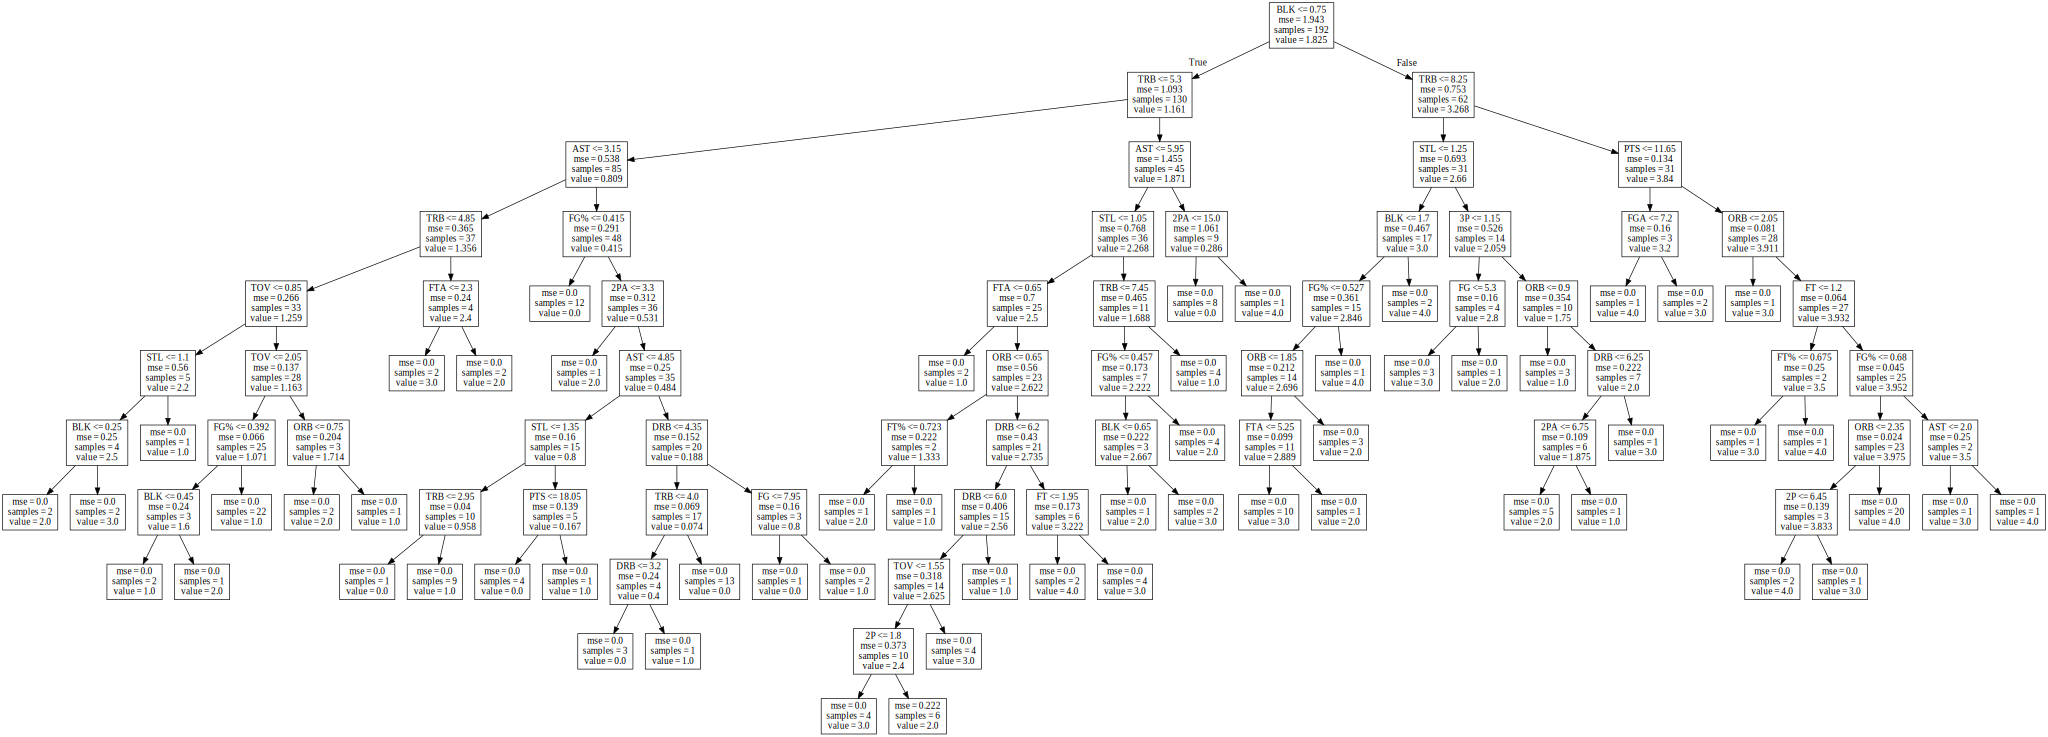

In [448]:
import graphviz
from sklearn.tree import export_graphviz
import pydot
index = 5
tree = rf_clf.estimators_[index]
from IPython.display import display
columns = list(X_train.columns)
display(graphviz.Source(export_graphviz(tree, feature_names=columns, class_names=True, out_file=None)))

# Save image to png file
export_graphviz(tree, out_file = 'tree.dot', feature_names = features, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('tree.dot')
graph.write_png('tree.png')

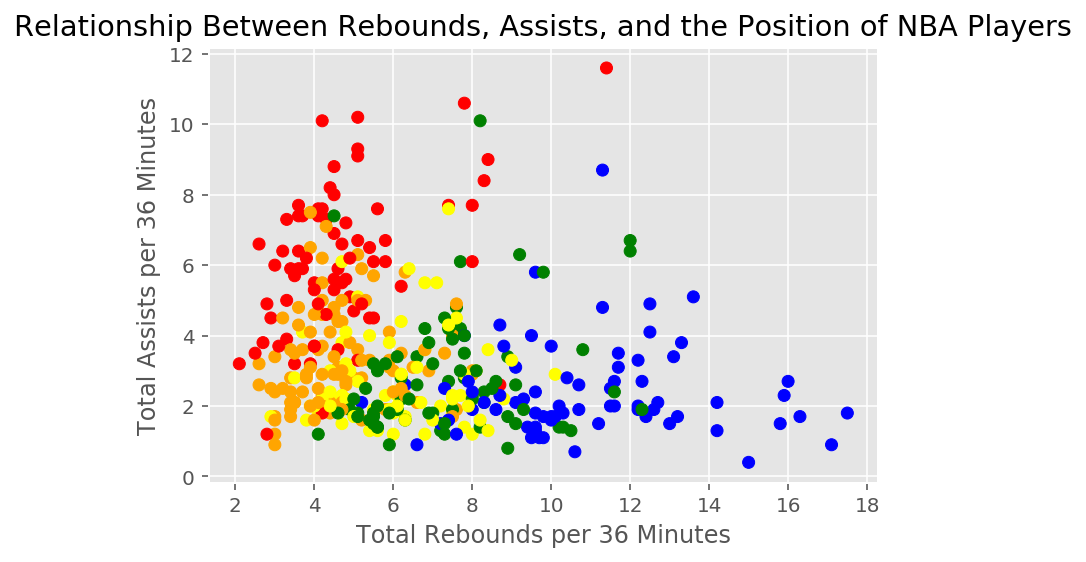

In [449]:
from matplotlib.colors import ListedColormap
cmap = ListedColormap(['r', 'orange', 'yellow', 'green', 'blue'])
fig = plt.figure()
plt.scatter(merged_inner['TRB'], merged_inner['AST'], c=merged_inner['Pos'], cmap=cmap)
plt.xlabel('Total Rebounds per 36 Minutes')
plt.ylabel('Total Assists per 36 Minutes')
plt.title('Relationship Between Rebounds, Assists, and the Position of NBA Players')
plt.show()

In [450]:
center_binary=merged_inner
center_binary['Pos']=center_binary['Pos'].replace({1:1,2:1,3:1,4:2})
#center_binary

In [451]:
train,test=train_test_split(center_binary, test_size=.5)
#create a model object
modelLogistic=LogisticRegression()
#train our model
modelLogistic.fit(train[sub_features],train[target_pos].values.ravel())
#evaluate the model 
acc_score_2=model_selection.cross_val_score(modelLogistic,center_binary[sub_features],center_binary[target_pos].values.ravel(), cv=7)
print(f"fit accuracy: {acc_score_2.mean()}")
scorerVar = make_scorer(f1_score, average='micro')
f1_score_2=model_selection.cross_val_score(modelLogistic,center_binary[sub_features],center_binary[target_pos].values.ravel(), cv=7, scoring=scorerVar)
print(f"f-score: {f1_score_2.mean()}")
conf_matrix_2 = sk.metrics.confusion_matrix(center_binary[target_pos].values.ravel(), modelLogistic.predict(center_binary[sub_features]))
print(conf_matrix_2)
#classification report
classification_rprt2=sk.metrics.classification_report(center_binary[target_pos].values.ravel(), modelLogistic.predict(center_binary[sub_features]))
print(classification_rprt2)

fit accuracy: 0.8058441558441559
f-score: 0.8058441558441559
[[ 48  25   0]
 [ 13 216  12]
 [  0  24  48]]
              precision    recall  f1-score   support

           0       0.79      0.66      0.72        73
           1       0.82      0.90      0.85       241
           2       0.80      0.67      0.73        72

    accuracy                           0.81       386
   macro avg       0.80      0.74      0.77       386
weighted avg       0.81      0.81      0.80       386



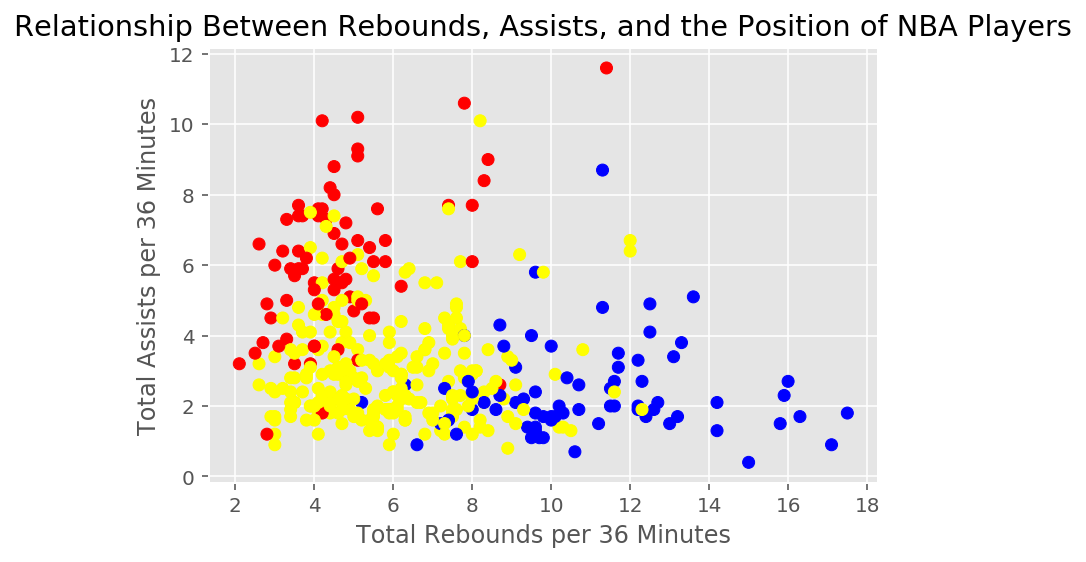

In [452]:
from matplotlib.colors import ListedColormap
cmap = ListedColormap(['r', 'yellow', 'blue'])
fig = plt.figure()
plt.scatter(center_binary['TRB'], center_binary['AST'], c=center_binary['Pos'], cmap=cmap)
plt.xlabel('Total Rebounds per 36 Minutes')
plt.ylabel('Total Assists per 36 Minutes')
plt.title('Relationship Between Rebounds, Assists, and the Position of NBA Players')
plt.show()

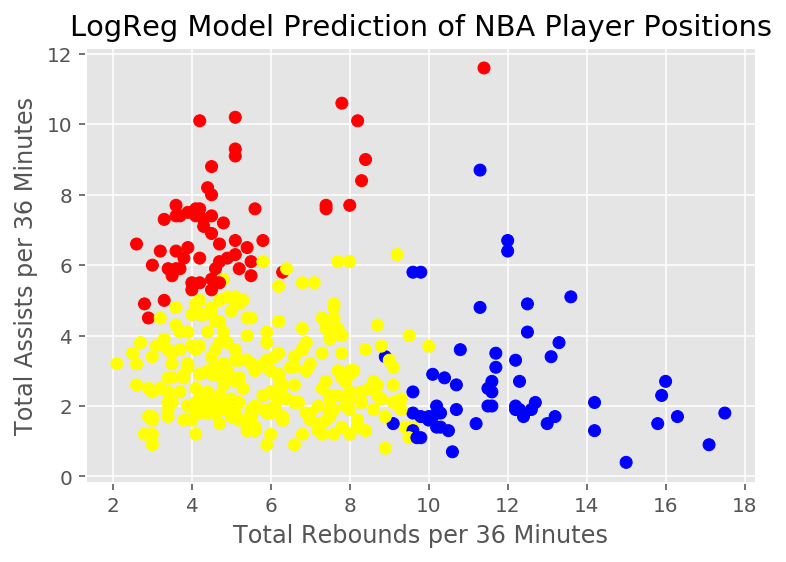

In [459]:
cmap = ListedColormap(['r', 'yellow', 'blue'])
fig = plt.figure()
plt.scatter(center_binary['TRB'], center_binary['AST'], c=modelLogistic.predict(center_binary[sub_features]), cmap=cmap)
plt.xlabel('Total Rebounds per 36 Minutes')
plt.ylabel('Total Assists per 36 Minutes')
plt.title('LogReg Model Prediction of NBA Player Positions')
plt.show()